### Deep Learning Course

2021/2022
***
Gonçalo Faria, André Martins
***
# Principal Component Analysis and Autoencoders

In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1.8

We will implement PCA with the following training data:

$\mathbf{x} =\begin{bmatrix} 1, 0, 1, 0 \end{bmatrix}$
$
\mathbf{x}^{(1)}=\begin{bmatrix}
2.5\\
2.4\\
\end{bmatrix}, \quad \mathbf{x}^{(2)}=\begin{bmatrix}
0.5\\
0.7\\
\end{bmatrix}, \quad \mathbf{x}^{(3)}=\begin{bmatrix}
2.2\\
2.9\\
\end{bmatrix}, \quad \mathbf{x}^{(4)}=\begin{bmatrix}
1.9\\
2.2\\
\end{bmatrix}
$

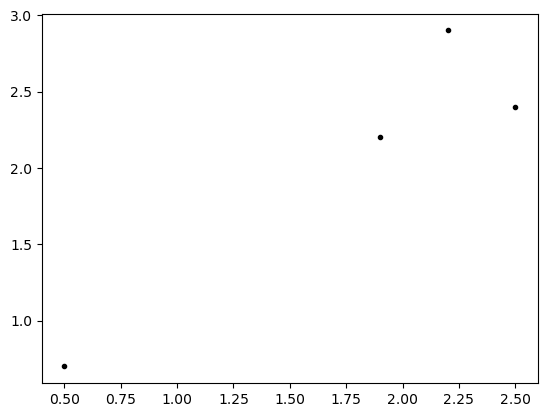

In [5]:
X = np.array([[2.5,2.4],[ 0.5, 0.7],[2.2, 2.9],[1.9,2.2]])

plt.plot(X[:, 0], X[:, 1], 'k.')
plt.show()

❓ Compute the covariance matrix and eigenvectors from the data

In [6]:
X = np.array([[2.5,2.4],[ 0.5, 0.7],[2.2, 2.9],[1.9,2.2]])

# compute the covariance matrix C
# Your code here


# compute the eigenvalues and eigenvectors 
## HINT: use the function from np.linalg : `np.linalg.eig()'
# Your code here


print(eigen_value,eigen_vector)


NameError: name 'eigen_value' is not defined

❓ What is the first principal component? 

In [7]:
# Your code here

print(max_component)
print(principal_component)

NameError: name 'max_component' is not defined

❓ Reduce the dimensionality of the training data by mapping the points onto the principal component

❓ Find the orthogonal projection of the data onto the first principal component’s subspace in the original coordinates.

In [8]:
# Your code here

❓ What is the mean squared error of the projected training data?

In [9]:
MSE = np.sum( 
    ( P_X - X )**2 
) /4

print(f" MSE : {MSE}")

NameError: name 'P_X' is not defined

Now let's plot everything

NameError: name 'P_X' is not defined

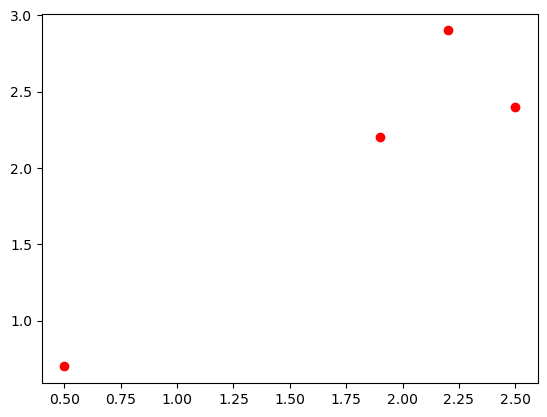

In [10]:
# plot
# data scatter
plt.scatter(X[:,0],X[:,1],color="red", label="X")

# projected scatter
plt.scatter(P_X[:,0],P_X[:,1],color="blue", label="projected X")


plt.arrow(0,0,eigen_vector[0,0],eigen_vector[1,0],
          head_width=0.2,width=0.04,head_length=0.3, color="darkgrey", label="u1")

plt.arrow(0,0, -eigen_vector[0,1], -eigen_vector[1,1],
          head_width=0.2,width=0.04,head_length=0.3, color="darkorange", label="u2")

# axis and legend
plt.axhline(0,color="black", linestyle="--")
plt.axvline(0,color="black", linestyle="--")
plt.legend()
plt.show()

### Applications : Image Denoising
Loading digits data and corrupting them with gaussian noise.

In [11]:
# Loading data and applying gaussian noise. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
data = load_digits()

X, y = data.data, data.target
# normalize images.
X = MinMaxScaler().fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1697, test_size=100
)

## applying gaussian noise
rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)

X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

Displaying the corrupted and uncorrupted images. 

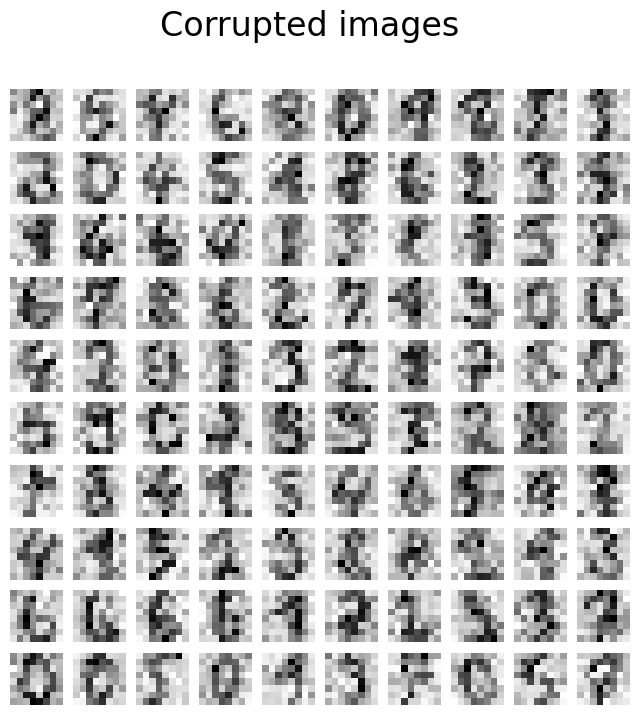

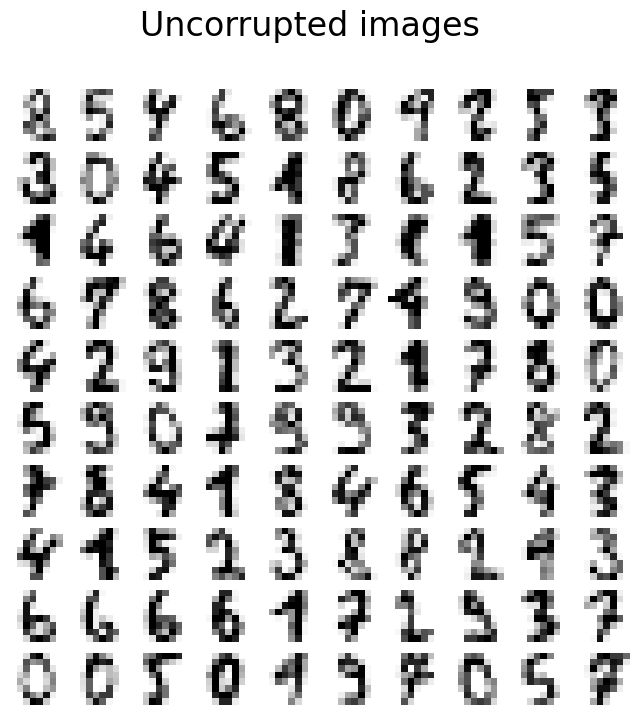

In [12]:
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((8, 8)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)
    
plot_digits(
    X_test_noisy, f"Corrupted images\n"
)

plot_digits(
    X_test,
    "Uncorrupted images",
)

#### Using PCA

In [13]:
from sklearn.decomposition import PCA
# Your code here
# implement PCA here using the functions from sklearn

# fit the model

# get the reconstruction

# compute the loss


plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {MSE_test}",
)

NameError: name 'X_reconstructed_pca' is not defined

#### Using an Autoencoder
Model definition.

In [21]:
from torch import nn
from torch import optim
import torch

# Implement the MLP class
class MLP(nn.Module):
    def __init__(self, input_size, layer_dims, final_activation=None):
        """
        MLP with ReLU activations on all layers except the last, which uses the provided activation.

        Args:
            input_size (int): Input size.
            layer_dims (list of int): Dimensions of each layer.
            final_activation (nn.Module or None): Activation function for the final layer (e.g., nn.Identity()).
        """
        super(MLP, self).__init__()
        
        layers = []
        current_size = input_size

        # Add hidden layers with ReLU activations
        for dim in layer_dims[:-1]:
            layers.append(nn.Linear(current_size, dim))
            layers.append(nn.ReLU())
            current_size = dim

        # Add the last layer with the final activation function
        layers.append(nn.Linear(current_size, layer_dims[-1]))
        if final_activation is not None:
            layers.append(final_activation)
        
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)

# Implement the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, latent_size=14, encoder_dims=[32, 32], decoder_dims=[32, 32],
                 input_size=64, final_activation=nn.Identity()):
        """
        Autoencoder with separate encoder and decoder MLP networks.

        Args:
            latent_size (int): Size of the latent space.
            encoder_dims (list of int): Dimensions of the encoder layers.
            decoder_dims (list of int): Dimensions of the decoder layers.
            input_size (int): Size of the input.
            final_activation (nn.Module): Activation function for the output layer.
        """
        super(Autoencoder, self).__init__()
        
        # Encoder network
        self.encoder = MLP(input_size=input_size, layer_dims=encoder_dims + [latent_size], final_activation=nn.ReLU())

        # Decoder network
        self.decoder = MLP(input_size=latent_size, layer_dims=decoder_dims[::-1] + [input_size], final_activation=final_activation)
    
    def forward(self, x):
        # Encoding
        latent = self.encoder(x)
        # Decoding
        reconstruction = self.decoder(latent)
        return reconstruction

# Device setup and utility function
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
totensor = lambda x: torch.from_numpy(x).float().to(device)


We instantiate the model, creating the data tensor, sending it to the device, defining the loss function, and optimizer. 

In [22]:
def train(
    model,
    X_train_noisy,
    epochs=20000,
    lr=4e-3
):
    # Set up device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # Move model to the device
    model = model.to(device)

    # Convert training data to tensor and move to device
    X_train = totensor(X_train_noisy)

    # Initialize optimizer and learning rate scheduler
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs - 1, eta_min=1e-8)

    # Use Mean Squared Error as the loss function
    criterion = nn.MSELoss()

    # To track losses
    losses = []

    model.train()

    for epoch in range(epochs):
        optimizer.zero_grad()

        # Forward pass
        reconstructed = model(X_train)

        # Calculate loss
        loss = criterion(reconstructed, X_train)
        losses.append(loss.item())

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Update learning rate scheduler
        scheduler.step()

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item()}")

    return losses

In [23]:
def test(model,
        X_test_noisy,
        X_test):
    
    model.eval()
    with torch.no_grad():
        reconstructed_test_ae = model(totensor(X_test_noisy)).numpy()
        MSE_test = np.mean((X_test - reconstructed_test_ae) ** 2)

    plot_digits(
        reconstructed_test_ae,
        f"Autoencoder reconstruction\nMSE: {MSE_test}",
    )

#### Autoencoder with linear activation function.

Autoencoder(
  (encoder): MLP(
    (net): Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): ReLU()
      (4): Linear(in_features=32, out_features=14, bias=True)
      (5): ReLU()
    )
  )
  (decoder): MLP(
    (net): Sequential(
      (0): Linear(in_features=14, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): ReLU()
      (4): Linear(in_features=32, out_features=64, bias=True)
      (5): Identity()
    )
  )
)
Epoch [0/1000], Loss: 0.3041060268878937
Epoch [100/1000], Loss: 0.11476530134677887
Epoch [200/1000], Loss: 0.0956185981631279
Epoch [300/1000], Loss: 0.08106628805398941
Epoch [400/1000], Loss: 0.07885675877332687
Epoch [500/1000], Loss: 0.07741784304380417
Epoch [600/1000], Loss: 0.07670959830284119
Epoch [700/1000], Loss: 0.07581257075071335
Epoch [800/1000], Loss: 0.07522376626729965
Epoch [

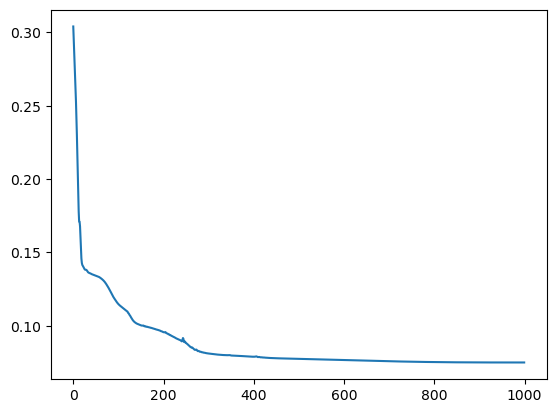

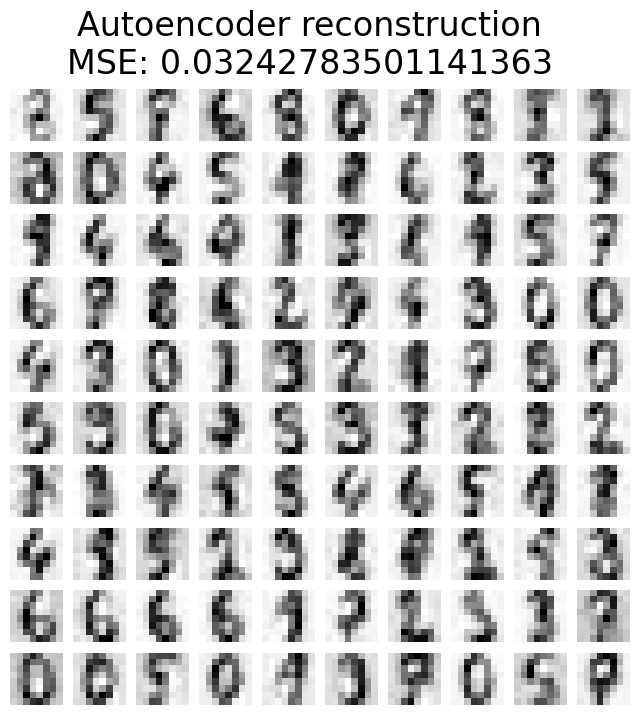

In [25]:
model = Autoencoder(
    latent_size=14,
    encoder_dims=[32,32],
    decoder_dims=[32,32],
    input_size=64,
    final_activation=nn.Identity()  # Specify the final activation function for the decoder
)

print(model)

losses = train(
    model=model,
    X_train_noisy=X_train_noisy,
    epochs=1000,
    lr=4e-3
)

plt.plot(losses)

test(model,
    X_test_noisy,
    X_test)

#### Autoencoder with non-linear activation function.

Autoencoder(
  (encoder): MLP(
    (net): Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): ReLU()
      (4): Linear(in_features=32, out_features=64, bias=True)
      (5): ReLU()
    )
  )
  (decoder): MLP(
    (net): Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): ReLU()
      (4): Linear(in_features=32, out_features=64, bias=True)
      (5): ReLU()
    )
  )
)
Epoch [0/20000], Loss: 0.28122663497924805
Epoch [100/20000], Loss: 0.18772633373737335
Epoch [200/20000], Loss: 0.16401121020317078
Epoch [300/20000], Loss: 0.15504418313503265
Epoch [400/20000], Loss: 0.12974302470684052
Epoch [500/20000], Loss: 0.10802704840898514
Epoch [600/20000], Loss: 0.09319320321083069
Epoch [700/20000], Loss: 0.0865168571472168
Epoch [800/20000], Loss: 0.08280394226312637
E

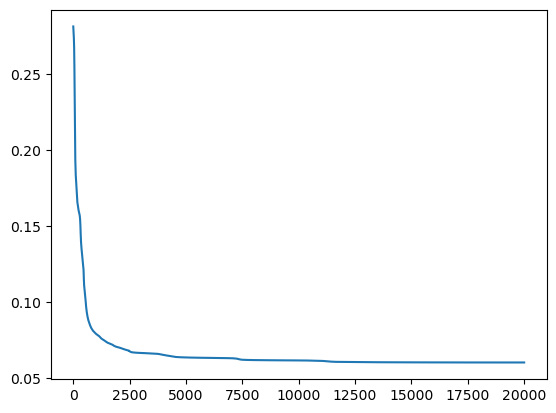

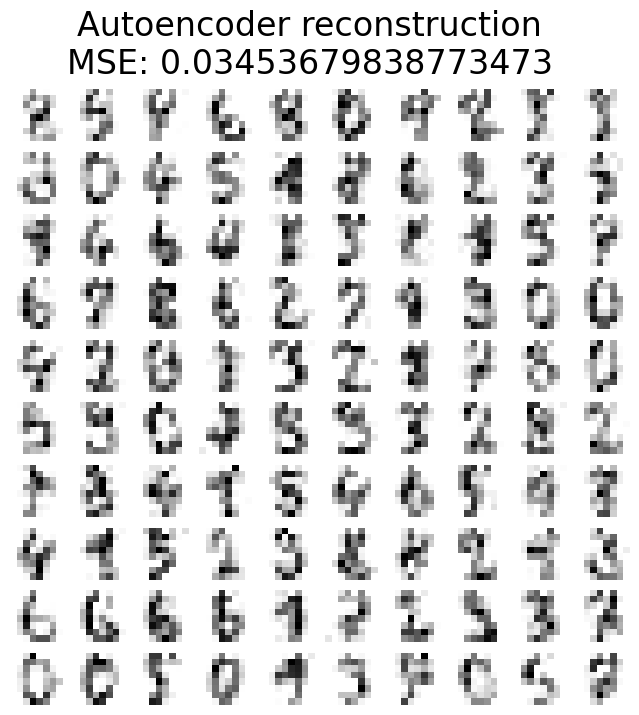

In [20]:
model = Autoencoder(
    latent_size=3,
    encoder_dims=[32,32],
    decoder_dims=[32,32],
    input_size=64,
    final_activation=nn.ReLU()
)

print(model)

losses = train(
    model=model,
    X_train_noisy=X_train_noisy,
    epochs=20000,
    lr=4e-4
)

plt.plot(losses)
plt.show()

test(model,
    X_test_noisy,
    X_test)

The size of the lower-dimensional subspace is significantly smaller with the autoencoder; however, the qualitative results are good. We encourage you to test different activation functions, number of epochs, bottleneck size, and network topology.

## Vizualizing the latent space

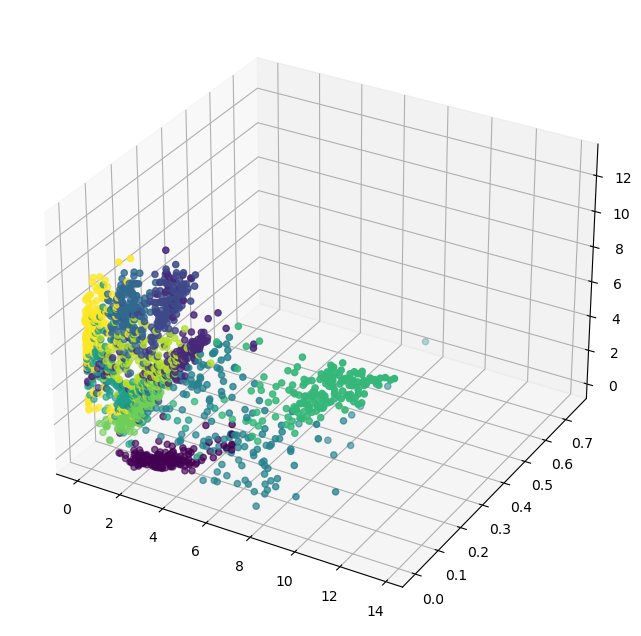

In [19]:
with torch.no_grad():
    latents = model.encoder(totensor(X_train)).numpy()
    
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(latents[:,0],latents[:,1], latents[:,2], c=y_train);

Note that the latent space contains clusters pretaining to each of the class labels.